# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [1]:
# TODO: code and runtime results
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
from sklearn import preprocessing, feature_selection
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
from matplotlib import pyplot as plt
from sklearn import tree, model_selection
import datetime
import math
from sklearn import ensemble, linear_model, metrics

## OBtaining Training Data and Test DAta, merging them and preprocessing both together.

In [4]:
transaction_train = pd.read_csv("D:\\Anaconda\\train_transaction.csv")



In [5]:
Identity_train = pd.read_csv("D:\\Anaconda\\train_identity.csv")
Identity_train = Identity_train[['TransactionID','DeviceType', 'DeviceInfo']]

In [6]:
Identity_train_copy = Identity_train.copy(deep = True)
Total_train_data = pd.merge(transaction_train, Identity_train, on = 'TransactionID', how = 'left')
Total_train_data = Total_train_data[['TransactionID','isFraud','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2', 'DeviceType', 'DeviceInfo']]

In [7]:
transaction_test = pd.read_csv("D:\\Anaconda\\test_transaction.csv")



In [8]:
Identity_test = pd.read_csv("D:\\Anaconda\\test_identity.csv")
Identity_test = Identity_test[['TransactionID','DeviceType', 'DeviceInfo']]

In [9]:
Total_test_data = pd.merge(transaction_test, Identity_test, on = 'TransactionID', how = 'left')
Total_test_data = Total_test_data[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2', 'DeviceType', 'DeviceInfo']]


In [10]:
Total_train_data.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,NaN,NaN
3,2987003,86499,50.0,W,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M


In [10]:
isFraud = Total_train_data['isFraud']
Total_train_data = Total_train_data.drop('isFraud', axis = 1)

## Filling missing values with mode or median depending upon whether the data is continuous or catgorical

In [12]:
df = pd.merge(Total_train_data, Total_test_data, how = 'outer')
cate_features = ['ProductCD', 'card4', 'card6', 'P_emaildomain','R_emaildomain', 'DeviceType', 'DeviceInfo' ]
df[cate_features]= df[cate_features].astype('category')
df.info()
df[cate_features] = df[cate_features].fillna(df[cate_features].mode().iloc[0])
for item in cate_features:
    Lab_encoder(item)


cont_features = ['addr1', 'addr2', 'dist1','dist2']
cont_imputer = preprocessing.Imputer(strategy = 'median')
df[cont_features] = cont_imputer.fit_transform(df[cont_features])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097231 entries, 0 to 1097230
Data columns (total 14 columns):
TransactionID     1097231 non-null int64
TransactionDT     1097231 non-null int64
TransactionAmt    1097231 non-null float64
ProductCD         1097231 non-null category
card4             1092568 non-null category
card6             1092653 non-null category
P_emaildomain     933583 non-null category
R_emaildomain     273161 non-null category
addr1             965916 non-null float64
addr2             965916 non-null float64
dist1             453743 non-null float64
dist2             74063 non-null float64
DeviceType        277741 non-null category
DeviceInfo        233723 non-null category
dtypes: category(7), float64(5), int64(2)
memory usage: 75.4 MB


C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
def Lab_encoder(item):
    lab_encoder = preprocessing.LabelEncoder()
    lab_encoder.fit(df[item])
    df[item] = lab_encoder.transform(df[item])

## converting the transactionDT into month, hour, day etc 

In [13]:
START_DATE='2012-01-12'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
df['TransactionDate'] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

print(df['TransactionDate'].head())
dict1 =  {'month' :[], 'year':[], 'day' :[], 'hour':[], 'minute' :[], 'second':[], }
for item in df['TransactionDate'].dt.to_pydatetime():
    dict1['month'].append(item.month)
    dict1['year'].append(item.year)
    dict1['day'].append(item.day)
    dict1['hour'].append(item.hour)
    dict1['minute'].append(item.minute)
    dict1['second'].append(item.second)
    
df['hour'] = dict1['hour']
df['month'] = dict1['month']
df['day'] = dict1['day']
df['year'] = dict1['year']

0   2012-01-13 00:00:00
1   2012-01-13 00:00:01
2   2012-01-13 00:01:09
3   2012-01-13 00:01:39
4   2012-01-13 00:01:46
Name: TransactionDate, dtype: datetime64[ns]


In [14]:
def convert_TransactionAmt(size):

    if(size < 100): 

        return 'Small'

    elif(size > 100 and size < 1000): 

        return 'Medium'

    else: 

        return 'Large'
df['TransactionAmt_cat'] = df['TransactionAmt'].map(convert_TransactionAmt)
df['TransactionAmt_cat'] = df['TransactionAmt_cat'].astype('category')
lab_encoder_amt = preprocessing.LabelEncoder()
lab_encoder_amt.fit(df['TransactionAmt_cat'])
df['TransactionAmt_cat'] = lab_encoder_amt.transform(df['TransactionAmt_cat'])
df=df.rename(columns = {'ProductCD':'ProductCD_Cat'})
df['ProductCD'] = transaction_train['ProductCD']

In [15]:
Train = df[0:Total_train_data.shape[0]]
Test = df[Total_train_data.shape[0]:]
Train['card6_A'] = transaction_train['card6']

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
Train['isFraud'] = isFraud
df0 = Train[Train['isFraud'] == 0]
df1 = Train[Train['isFraud'] == 1]

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
df0.shape

(569877, 23)

In [177]:
df1.shape

(20663, 24)

##  The actual plotting of the curves for fradulent and non fradulent

Text(0.5, 1.0, 'Count of Non-fraudulent & Fraudulent transactions')

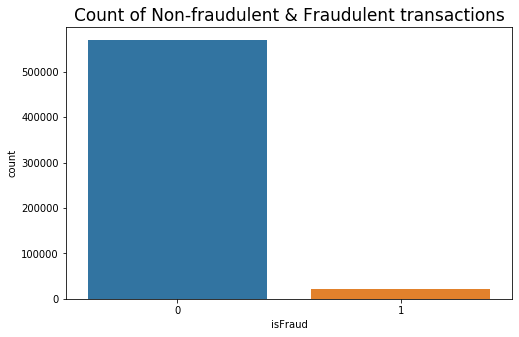

In [44]:
plt.figure(figsize=(8,5))
plot_tr = sns.countplot(x='isFraud',data=Train)
plot_tr.set_title("Count of Non-fraudulent & Fraudulent transactions", fontsize=17)

### The below plot indicates that the most number of fraudulent and non-fraudulent transactions occur in country code 87

<Figure size 1296x360 with 0 Axes>

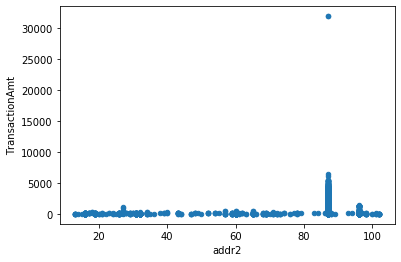

<Figure size 1296x360 with 0 Axes>

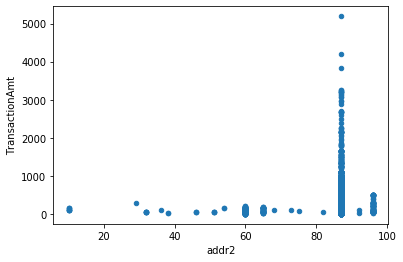

<Figure size 1296x360 with 0 Axes>

In [45]:
df0.plot(kind='scatter',x='addr2',y='TransactionAmt')
plt.figure(figsize=(18,5))
df1.plot(kind='scatter',x='addr2',y='TransactionAmt')
plt.figure(figsize=(18,5))

Write your answer here

<Figure size 1296x360 with 0 Axes>

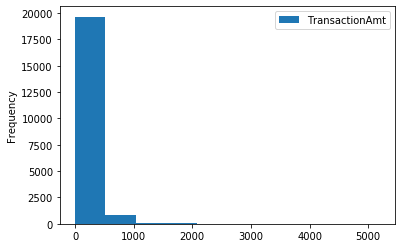

<Figure size 1296x360 with 0 Axes>

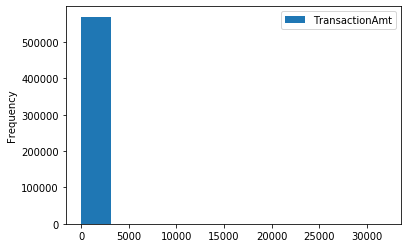

<Figure size 1296x360 with 0 Axes>

In [19]:
df1.plot(kind='hist',x='addr1',y='TransactionAmt')
plt.figure(figsize=(18,5))
df0.plot(kind='hist',x='addr1',y='TransactionAmt')
plt.figure(figsize=(18,5))

### The below plot indicates that the most amount of fradulent transactions happens with either code 0(C) or code 4(W)

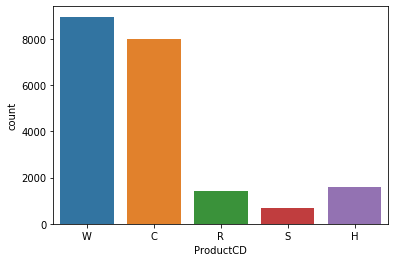

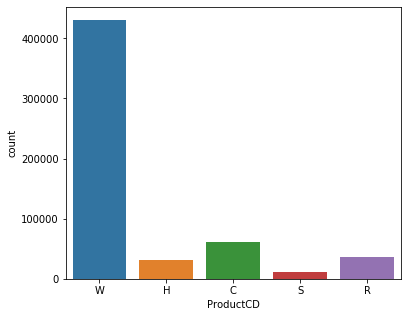

In [81]:
plot_tr = sns.countplot(x='ProductCD',data=df1)
plt.figure(figsize=(6,5))
plot_tr = sns.countplot(x='ProductCD',data=df0)

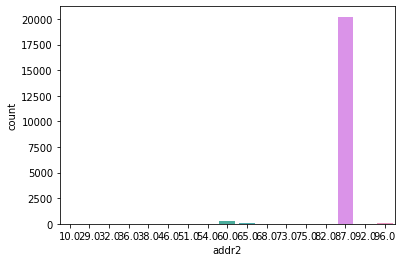

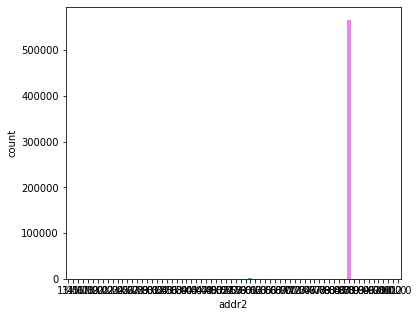

In [65]:
plot_tr = sns.countplot(x='addr2',data=df1)
plt.figure(figsize=(6,5))
plot_tr = sns.countplot(x='addr2',data=df0)

In [22]:
Train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,isFraud,card6_A
0,2987000,86400,68.5,4,1,1,16,16,315.0,87.0,...,2526,2012-01-13 00:00:00,0,1,13,2012,2,W,0,credit
1,2987001,86401,29.0,4,2,1,16,16,325.0,87.0,...,2526,2012-01-13 00:00:01,0,1,13,2012,2,W,0,credit
2,2987002,86469,59.0,4,3,2,35,16,330.0,87.0,...,2526,2012-01-13 00:01:09,0,1,13,2012,2,W,0,debit
3,2987003,86499,50.0,4,2,2,54,16,476.0,87.0,...,2526,2012-01-13 00:01:39,0,1,13,2012,2,W,0,debit
4,2987004,86506,50.0,1,2,1,16,16,420.0,87.0,...,1565,2012-01-13 00:01:46,0,1,13,2012,2,H,0,credit


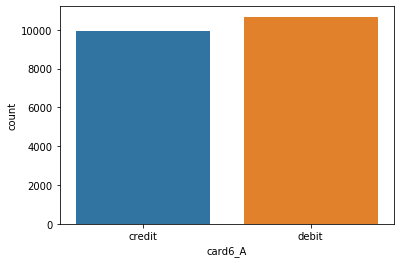

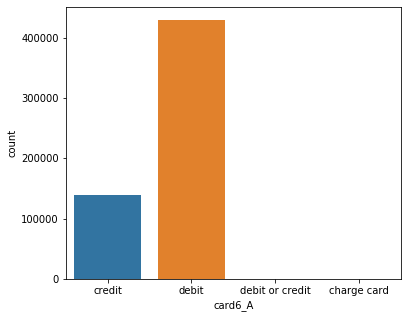

In [25]:
plot_tr = sns.countplot(x='card6_A',data=df1)
plt.figure(figsize=(6,5))
plot_tr = sns.countplot(x='card6_A',data=df0)

In [78]:
df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,dist2,DeviceType,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD
0,2987000,86400,68.5,4,1,1,16,16,315.0,87.0,...,41.0,0,2526,2012-01-13 00:00:00,0,1,13,2012,2,W
1,2987001,86401,29.0,4,2,1,16,16,325.0,87.0,...,41.0,0,2526,2012-01-13 00:00:01,0,1,13,2012,2,W
2,2987002,86469,59.0,4,3,2,35,16,330.0,87.0,...,41.0,0,2526,2012-01-13 00:01:09,0,1,13,2012,2,W
3,2987003,86499,50.0,4,2,2,54,16,476.0,87.0,...,41.0,0,2526,2012-01-13 00:01:39,0,1,13,2012,2,W
4,2987004,86506,50.0,1,2,1,16,16,420.0,87.0,...,41.0,1,1565,2012-01-13 00:01:46,0,1,13,2012,2,H


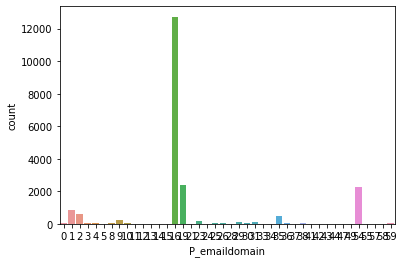

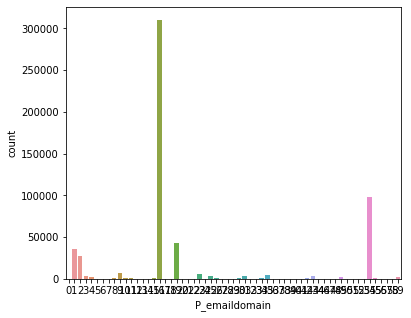

In [18]:
plot = sns.countplot(x='P_emaildomain',data=df1)
plt.figure(figsize=(6,5))
plot = sns.countplot(x='P_emaildomain',data=df0)

In [219]:
df1.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud,Weekday
203,2987203,89760,445.000,4,3,1,2,16,251.0,87.0,...,2012-01-13 00:56:00,0,1,13,2012,1,W,credit,1,5.0
240,2987240,90193,37.098,0,3,1,19,19,299.0,87.0,...,2012-01-13 01:03:13,1,1,13,2012,2,C,credit,1,6.0
243,2987243,90246,37.098,0,3,1,19,19,299.0,87.0,...,2012-01-13 01:04:06,1,1,13,2012,2,C,credit,1,6.0
245,2987245,90295,37.098,0,3,1,19,19,299.0,87.0,...,2012-01-13 01:04:55,1,1,13,2012,2,C,credit,1,6.0
288,2987288,90986,155.521,0,3,1,35,35,299.0,87.0,...,2012-01-13 01:16:26,1,1,13,2012,1,C,credit,1,6.0


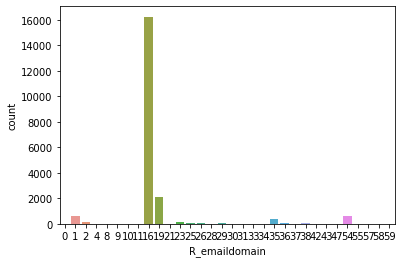

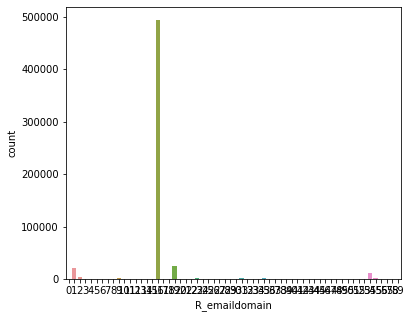

In [19]:
plot = sns.countplot(x='R_emaildomain',data=df1)
plt.figure(figsize=(6,5))
plot = sns.countplot(x='R_emaildomain',data=df0)

In [20]:
Train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud
0,2987000,86400,68.5,4,1,1,16,16,315.0,87.0,...,2526,2012-01-13 00:00:00,0,1,13,2012,2,W,credit,0
1,2987001,86401,29.0,4,2,1,16,16,325.0,87.0,...,2526,2012-01-13 00:00:01,0,1,13,2012,2,W,credit,0
2,2987002,86469,59.0,4,3,2,35,16,330.0,87.0,...,2526,2012-01-13 00:01:09,0,1,13,2012,2,W,debit,0
3,2987003,86499,50.0,4,2,2,54,16,476.0,87.0,...,2526,2012-01-13 00:01:39,0,1,13,2012,2,W,debit,0
4,2987004,86506,50.0,1,2,1,16,16,420.0,87.0,...,1565,2012-01-13 00:01:46,0,1,13,2012,2,H,credit,0


,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud
0,2987000,86400,68.5,4,1,1,16,16,315.0,87.0,...,2526,2012-01-13 00:00:00,0,1,13,2012,2,W,credit,0
1,2987001,86401,29.0,4,2,1,16,16,325.0,87.0,...,2526,2012-01-13 00:00:01,0,1,13,2012,2,W,credit,0
2,2987002,86469,59.0,4,3,2,35,16,330.0,87.0,...,2526,2012-01-13 00:01:09,0,1,13,2012,2,W,debit,0
3,2987003,86499,50.0,4,2,2,54,16,476.0,87.0,...,2526,2012-01-13 00:01:39,0,1,13,2012,2,W,debit,0
4,2987004,86506,50.0,1,2,1,16,16,420.0,87.0,...,1565,2012-01-13 00:01:46,0,1,13,2012,2,H,credit,0


In [249]:
df1_copy = df1.copy(deep = True)

In [250]:
df1_copy[cate_features] = transaction_train[cate_features]

In [251]:
df1_copy.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud,Weekday
203,2987203,89760,445.000,4,3,1,aol.com,16,251.0,87.0,...,2012-01-13 00:56:00,0,1,13,2012,1,W,credit,1,4
240,2987240,90193,37.098,0,3,1,hotmail.com,hotmail.com,299.0,87.0,...,2012-01-13 01:03:13,1,1,13,2012,2,C,credit,1,4
243,2987243,90246,37.098,0,3,1,hotmail.com,hotmail.com,299.0,87.0,...,2012-01-13 01:04:06,1,1,13,2012,2,C,credit,1,4
245,2987245,90295,37.098,0,3,1,hotmail.com,hotmail.com,299.0,87.0,...,2012-01-13 01:04:55,1,1,13,2012,2,C,credit,1,4
288,2987288,90986,155.521,0,3,1,outlook.com,outlook.com,299.0,87.0,...,2012-01-13 01:16:26,1,1,13,2012,1,C,credit,1,4


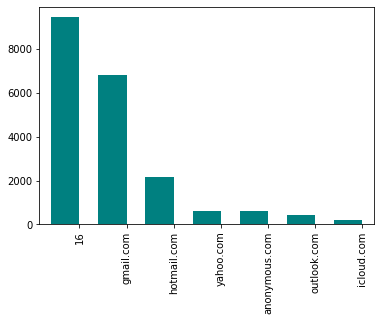

In [252]:

fig = plt.figure()
ax = fig.add_subplot(111)
df1_copy['R_emaildomain'].value_counts()[:7].plot(kind='bar',ax=ax,color='teal',position=1,width=0.6)
plt.show()

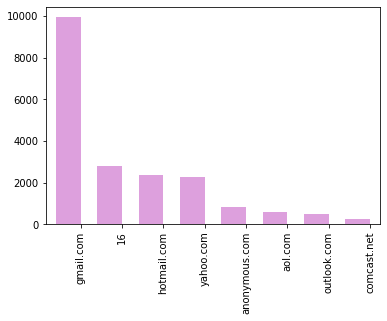

In [254]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1_copy['P_emaildomain'].value_counts()[:8].plot(kind='bar',ax=ax,color='plum',position=1,width=0.6)
plt.show()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 2 - Transaction Frequency

In [24]:
Train_87 = Train[Train['addr2'] == 87]
Train_87.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud
0,2987000,86400,68.5,4,1,1,16,16,315.0,87.0,...,2526,2012-01-13 00:00:00,0,1,13,2012,2,W,credit,0
1,2987001,86401,29.0,4,2,1,16,16,325.0,87.0,...,2526,2012-01-13 00:00:01,0,1,13,2012,2,W,credit,0
2,2987002,86469,59.0,4,3,2,35,16,330.0,87.0,...,2526,2012-01-13 00:01:09,0,1,13,2012,2,W,debit,0
3,2987003,86499,50.0,4,2,2,54,16,476.0,87.0,...,2526,2012-01-13 00:01:39,0,1,13,2012,2,W,debit,0
4,2987004,86506,50.0,1,2,1,16,16,420.0,87.0,...,1565,2012-01-13 00:01:46,0,1,13,2012,2,H,credit,0


In [25]:
Train_87_0 = Train_87[Train_87['isFraud'] == 0]

In [26]:
Train_87_1 = Train_87[Train_87['isFraud'] == 1]

<Figure size 432x360 with 0 Axes>

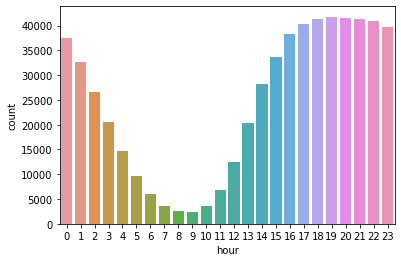

<Figure size 432x360 with 0 Axes>

In [28]:
plot_tr = sns.countplot(x='hour',data = Train_87)
plt.figure(figsize=(6,5))


<Figure size 1296x360 with 0 Axes>

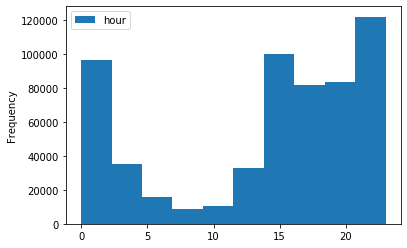

<Figure size 1296x360 with 0 Axes>

In [30]:
Train_87.plot(kind='hist',y='hour')
plt.figure(figsize=(18,5))


In [2]:
# TODO: code to generate the frequency graph

For 

## Part 3 - Product Code

In [32]:
Train.head(30)

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud
0,2987000,86400,68.500,4,1,1,16,16,315.0,87.0,...,2526,2012-01-13 00:00:00,0,1,13,2012,2,W,credit,0
1,2987001,86401,29.000,4,2,1,16,16,325.0,87.0,...,2526,2012-01-13 00:00:01,0,1,13,2012,2,W,credit,0
2,2987002,86469,59.000,4,3,2,35,16,330.0,87.0,...,2526,2012-01-13 00:01:09,0,1,13,2012,2,W,debit,0
3,2987003,86499,50.000,4,2,2,54,16,476.0,87.0,...,2526,2012-01-13 00:01:39,0,1,13,2012,2,W,debit,0
4,2987004,86506,50.000,1,2,1,16,16,420.0,87.0,...,1565,2012-01-13 00:01:46,0,1,13,2012,2,H,credit,0
5,2987005,86510,49.000,4,3,2,16,16,272.0,87.0,...,2526,2012-01-13 00:01:50,0,1,13,2012,2,W,debit,0
6,2987006,86522,159.000,4,3,2,54,16,126.0,87.0,...,2526,2012-01-13 00:02:02,0,1,13,2012,1,W,debit,0
7,2987007,86529,422.500,4,3,2,29,16,325.0,87.0,...,2526,2012-01-13 00:02:09,0,1,13,2012,1,W,debit,0
8,2987008,86535,15.000,1,3,2,1,16,337.0,87.0,...,2693,2012-01-13 00:02:15,0,1,13,2012,2,H,debit,0
9,2987009,86536,117.000,4,2,2,54,16,204.0,87.0,...,2526,2012-01-13 00:02:16,0,1,13,2012,1,W,debit,0


### From the below statement, we see that the most expensive product belongs to W

In [37]:
Train[Train['TransactionAmt'] == Train['TransactionAmt'].max()]['ProductCD']

274336    W
274339    W
Name: ProductCD, dtype: object

### From the below statement, we see that the least expensive product belongs to C

In [38]:
Train[Train['TransactionAmt'] == Train['TransactionAmt'].min()]['ProductCD']

374299    C
Name: ProductCD, dtype: object

In [46]:
Train_ProductCD = Train.groupby(['ProductCD'])

### The box plot shows that the most expensive product belongs to W

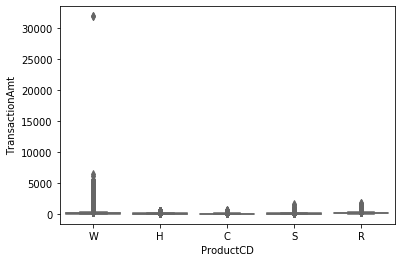

In [66]:
sns.boxplot(x="ProductCD", y="TransactionAmt", data=Train, palette="Set3")

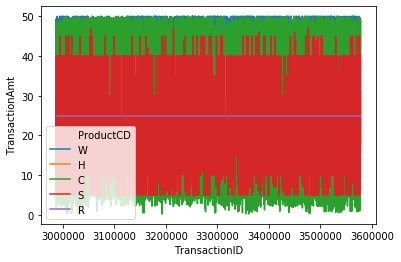

In [63]:
sns.lineplot(x="TransactionID", y="TransactionAmt", hue="ProductCD", data=Train[Train['TransactionAmt'] < 50])

### The below graph plotted between TransactionAmts less than 50 with ProductCD as hue gives us the least expensive category as C

Write your answer here

## Part 4 - Correlation Coefficient

In [4]:
# TODO: code to calculate correlation coefficient

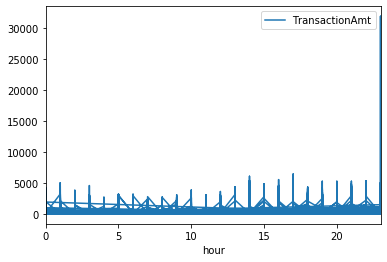

In [67]:
Train.plot(kind="line",x="hour",y="TransactionAmt")

In [70]:
temp =Train[['TransactionAmt', 'hour']]

In [72]:
temp.corr(method = 'pearson')

,TransactionAmt,hour
TransactionAmt,1.000000,0.044532
hour,0.044532,1.000000


In [76]:
l =   list()
for x in range(0,23,1):
    temp1 = Train[Train['hour']==x]
    l.append(temp1['TransactionAmt'].sum())

In [77]:
l

[4660496.261,
 3805384.966,
 2976132.2809999995,
 2217529.208,
 1527838.58,
 1021159.8920000001,
 635052.6120000001,
 421726.359,
 325013.26,
 358256.811,
 480345.22400000005,
 839577.671,
 1632213.483,
 2925521.8839999996,
 4138602.1730000004,
 5091228.066,
 5631690.295,
 6150905.438999999,
 6145356.313,
 6049589.1049999995,
 6039937.188,
 5867886.651000001,
 5597750.094]

In [81]:
temp2 = pd.DataFrame(l)

In [99]:
temp2.head()
temp2=temp2.rename(columns = { 'Hour': 'Total_Transaction'})

In [102]:
temp2.shape

(23, 1)

In [108]:
temp2.head()

,Total_Transaction
0,4660496.261
1,3805384.966
2,2976132.281
3,2217529.208
4,1527838.580


In [112]:
temp2.head()

,Total_Transaction,Hour
0,4660496.261,0
1,3805384.966,1
2,2976132.281,2
3,2217529.208,3
4,1527838.580,4


In [116]:
temp2.corr(method = 'spearman')

,Total_Transaction,Hour
Total_Transaction,1.000000,0.607708
Hour,0.607708,1.000000


In [111]:
temp2['Hour'] = temp2.index

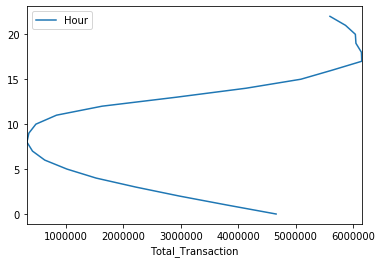

In [114]:
temp2.plot(kind="line",x='Total_Transaction',y= 'Hour')


The Transactions are added for each hour and the sum is correlated with the hour.
The correlation obtained is 0.60 when spearman is considered.

## Part 5 - Interesting Plot

In [119]:
# TODO: code to generate the plot here.
Total_train_data.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,NaN,NaN
3,2987003,86499,50.0,W,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M


In [120]:
 Total_train_data_copy =  Total_train_data.copy(deep = True)

In [122]:
cate_features2 = ['P_emaildomain', 'R_emaildomain']
Total_train_data_copy[cate_features2] = Total_train_data_copy[cate_features2].fillna(df[cate_features].mode().iloc[0])

In [123]:
Train['P_domainName'] = Total_train_data_copy['P_emaildomain']

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
Train['R_domainName'] = Total_train_data_copy['R_emaildomain']

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
Total_train_data_copy.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,discover,credit,16,16,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,86401,29.0,W,mastercard,credit,gmail.com,16,325.0,87.0,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,W,visa,debit,outlook.com,16,330.0,87.0,287.0,NaN,NaN,NaN
3,2987003,86499,50.0,W,mastercard,debit,yahoo.com,16,476.0,87.0,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,H,mastercard,credit,gmail.com,16,420.0,87.0,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M


In [130]:
Total_train_data['R_emaildomain'].isnull() =  Total_train_data['R_emaildomain'].value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
ymail.com             207
prodigy.net.mx        207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

In [131]:
Train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud,P_domainName,R_domainName
0,2987000,86400,68.5,4,1,1,16,16,315.0,87.0,...,0,1,13,2012,2,W,credit,0,16,16
1,2987001,86401,29.0,4,2,1,16,16,325.0,87.0,...,0,1,13,2012,2,W,credit,0,gmail.com,16
2,2987002,86469,59.0,4,3,2,35,16,330.0,87.0,...,0,1,13,2012,2,W,debit,0,outlook.com,16
3,2987003,86499,50.0,4,2,2,54,16,476.0,87.0,...,0,1,13,2012,2,W,debit,0,yahoo.com,16
4,2987004,86506,50.0,1,2,1,16,16,420.0,87.0,...,0,1,13,2012,2,H,credit,0,gmail.com,16


In [148]:
df1.tail()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud
590361,3577361,15807368,1224.000,4,3,2,54,16,191.0,87.0,...,2526,2012-07-12 22:56:08,22,7,12,2012,0,W,debit,1
590364,3577364,15807516,69.964,0,2,2,19,19,299.0,87.0,...,1647,2012-07-12 22:58:36,22,7,12,2012,2,C,debit,1
590368,3577368,15807677,100.000,1,0,1,19,19,299.0,87.0,...,2693,2012-07-12 23:01:17,23,7,12,2012,0,H,credit,1
590372,3577372,15807758,117.000,4,3,1,54,16,272.0,87.0,...,2526,2012-07-12 23:02:38,23,7,12,2012,1,W,credit,1
590526,3577526,15810876,250.000,2,3,1,16,16,272.0,87.0,...,116,2012-07-12 23:54:36,23,7,12,2012,1,R,credit,1


In [134]:
df1['DeviceInfo'].value_counts()

2526    15177
2693     1240
1170      278
2688      180
1789      169
2772      103
2459       96
2741       76
798        61
2167       60
2107       57
368        51
764        51
2773       49
1818       45
2774       44
1216       40
1959       39
2142       39
1903       37
1246       35
2043       34
2487       34
1884       33
2058       33
1212       32
700        32
2026       31
2176       30
1271       30
        ...  
2747        1
84          1
2670        1
1027        1
1155        1
1207        1
1923        1
1250        1
21          1
309         1
601         1
2759        1
2767        1
1745        1
2615        1
406         1
1985        1
2504        1
2055        1
1135        1
962         1
1659        1
322         1
2650        1
1209        1
565         1
2618        1
670         1
2025        1
1582        1
Name: DeviceInfo, Length: 420, dtype: int64

In [167]:


l2 = list()
for item in df1['TransactionDate']:
    l2.append(item.weekday())

In [168]:
len(l2)

20663

In [169]:
l2

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [171]:
Weekday = pd.Series(l2)

0        4
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       4
15       4
16       4
17       4
18       4
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       4
27       4
28       4
29       4
        ..
20633    3
20634    3
20635    3
20636    3
20637    3
20638    3
20639    3
20640    3
20641    3
20642    3
20643    3
20644    3
20645    3
20646    3
20647    3
20648    3
20649    3
20650    3
20651    3
20652    3
20653    3
20654    3
20655    3
20656    3
20657    3
20658    3
20659    3
20660    3
20661    3
20662    3
Length: 20663, dtype: int64

In [226]:
df1['Weekday'] =  l2

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
df1['Weekday'].value_counts()

4.0    99
1.0    93
3.0    92
2.0    90
6.0    83
5.0    74
0.0    58
Name: Weekday, dtype: int64

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [227]:
df1.tail()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD,card6_A,isFraud,Weekday
590361,3577361,15807368,1224.000,4,3,2,54,16,191.0,87.0,...,2012-07-12 22:56:08,22,7,12,2012,0,W,debit,1,3
590364,3577364,15807516,69.964,0,2,2,19,19,299.0,87.0,...,2012-07-12 22:58:36,22,7,12,2012,2,C,debit,1,3
590368,3577368,15807677,100.000,1,0,1,19,19,299.0,87.0,...,2012-07-12 23:01:17,23,7,12,2012,0,H,credit,1,3
590372,3577372,15807758,117.000,4,3,1,54,16,272.0,87.0,...,2012-07-12 23:02:38,23,7,12,2012,1,W,credit,1,3
590526,3577526,15810876,250.000,2,3,1,16,16,272.0,87.0,...,2012-07-12 23:54:36,23,7,12,2012,1,R,credit,1,3


In [228]:
df1['Weekday'].value_counts()

4    3550
3    3211
5    2963
2    2946
1    2803
0    2687
6    2503
Name: Weekday, dtype: int64

In [232]:
df_temp = df1[df1['Weekday'] == 4]

In [233]:
df_temp['hour'].value_counts()

17    273
23    257
19    242
18    236
21    228
20    223
16    213
22    208
1     184
0     159
15    157
2     154
4     152
3     144
14    121
5     100
13     83
12     72
6      71
8      64
7      61
11     59
9      53
10     36
Name: hour, dtype: int64

### The maximum fradulent transactions happen on Friday between 5pm to 11pm

# Part 6 - Prediction Model

In [180]:
isFraud_new = df_new['isFraud']
TransactionID = df_new['TransactionID']
df_new = df_new.drop(['isFraud' , 'TransactionID'], axis = 1)

In [183]:
df_new.shape

(43458, 22)

In [184]:
df_new.head()

,DeviceInfo,DeviceType,P_emaildomain,ProductCD,ProductCD_Cat,R_emaildomain,TransactionAmt,TransactionAmt_cat,TransactionDT,TransactionDate,...,addr2,card4,card6,card6_A,day,dist1,dist2,hour,month,year
131300,2526,0,54,W,4,16,15.95,2,2596615,2012-02-11 01:16:55,...,87.0,3,2,debit,11,17.0,41.0,1,2,2012
509588,2526,0,16,W,4,16,22.97,2,13355412,2012-06-14 13:50:12,...,87.0,2,2,debit,14,8.0,41.0,13,6,2012
488081,2526,0,16,W,4,16,57.95,2,12705534,2012-06-07 01:18:54,...,87.0,3,2,debit,7,8.0,41.0,1,6,2012
509090,2526,0,54,W,4,16,28.95,2,13337987,2012-06-14 08:59:47,...,87.0,3,2,debit,14,39.0,41.0,8,6,2012
384556,2526,0,54,W,4,16,81.95,2,9648200,2012-05-02 16:03:20,...,87.0,2,2,debit,2,9.0,41.0,16,5,2012


In [189]:
df_new = df_new.drop(['Weekday', 'TransactionDate', 'card6_A', 'DeviceInfo', 'ProductCD', 'TransactionDT', 'year'], axis = 1)

KeyError: "['TransactionDate' 'card6_A' 'DeviceInfo' 'ProductCD' 'TransactionDT'\n 'year'] not found in axis"

In [192]:
df_new = df_new.drop('Weekday', axis= 1)

In [193]:
df_new.head()

,DeviceType,P_emaildomain,ProductCD_Cat,R_emaildomain,TransactionAmt,TransactionAmt_cat,addr1,addr2,card4,card6,day,dist1,dist2,hour,month
131300,0,54,4,16,15.95,2,143.0,87.0,3,2,11,17.0,41.0,1,2
509588,0,16,4,16,22.97,2,264.0,87.0,2,2,14,8.0,41.0,13,6
488081,0,16,4,16,57.95,2,205.0,87.0,3,2,7,8.0,41.0,1,6
509090,0,54,4,16,28.95,2,433.0,87.0,3,2,14,39.0,41.0,8,6
384556,0,54,4,16,81.95,2,433.0,87.0,2,2,2,9.0,41.0,16,5


In [194]:
rf  = ensemble.RandomForestClassifier()

rf.fit(df_new, isFraud_new)

print(rf.feature_importances_)


C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03291719 0.06327985 0.07630102 0.0280695  0.16657639 0.01741207
 0.1200114  0.00314979 0.02666989 0.04086494 0.13586244 0.07090876
 0.03199931 0.11140444 0.07457301]


In [196]:
def fit_model_objective(estimator, grid, X_train, y_train):
    grid_estimator = model_selection.GridSearchCV(estimator, grid, cv=10)

    grid_estimator.fit(X_train, y_train)

    print(grid_estimator.cv_results_)

    print(grid_estimator.best_params_)

    final_model = grid_estimator.best_estimator_

    print(final_model.coef_)

    print(final_model.intercept_)

    print(grid_estimator.best_score_)

    print(grid_estimator.score(X_train, y_train))

    return final_model

In [197]:
linr_estimator = linear_model.LinearRegression()

linr_grid = {'fit_intercept':['False','True']}

final_model = fit_model_objective(linr_estimator, linr_grid, df_new, isFraud_new)

{'mean_fit_time': array([0.10749333, 0.03127198]), 'std_fit_time': array([0.23362301, 0.00625341]), 'mean_score_time': array([0.00307972, 0.00267422]), 'std_score_time': array([0.00340983, 0.00494563]), 'param_fit_intercept': masked_array(data=['False', 'True'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'fit_intercept': 'False'}, {'fit_intercept': 'True'}], 'split0_test_score': array([0., 0.]), 'split1_test_score': array([0., 0.]), 'split2_test_score': array([0., 0.]), 'split3_test_score': array([0., 0.]), 'split4_test_score': array([0., 0.]), 'split5_test_score': array([-0.89133834, -0.89133834]), 'split6_test_score': array([0., 0.]), 'split7_test_score': array([0., 0.]), 'split8_test_score': array([0., 0.]), 'split9_test_score': array([0., 0.]), 'mean_test_score': array([-0.08913794, -0.08913794]), 'std_test_score': array([0.26740697, 0.26740697]), 'rank_test_score': array([1, 1])}
{'fit_intercept': 'False'}
[ 8.65430173e-02 -2.51

In [198]:
df_new.head()

,DeviceType,P_emaildomain,ProductCD_Cat,R_emaildomain,TransactionAmt,TransactionAmt_cat,addr1,addr2,card4,card6,day,dist1,dist2,hour,month
131300,0,54,4,16,15.95,2,143.0,87.0,3,2,11,17.0,41.0,1,2
509588,0,16,4,16,22.97,2,264.0,87.0,2,2,14,8.0,41.0,13,6
488081,0,16,4,16,57.95,2,205.0,87.0,3,2,7,8.0,41.0,1,6
509090,0,54,4,16,28.95,2,433.0,87.0,3,2,14,39.0,41.0,8,6
384556,0,54,4,16,81.95,2,433.0,87.0,2,2,2,9.0,41.0,16,5


In [199]:
Test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,...,dist2,DeviceType,DeviceInfo,TransactionDate,hour,month,day,year,TransactionAmt_cat,ProductCD
590540,3663549,18403224,31.95,4,3,2,16,16,170.0,87.0,...,41.0,0,2526,2012-08-12 00:00:24,0,8,12,2012,2,NaN
590541,3663550,18403263,49.00,4,3,2,2,16,299.0,87.0,...,41.0,0,2526,2012-08-12 00:01:03,0,8,12,2012,2,NaN
590542,3663551,18403310,171.00,4,3,2,19,16,472.0,87.0,...,41.0,0,2526,2012-08-12 00:01:50,0,8,12,2012,1,NaN
590543,3663552,18403310,284.95,4,3,2,16,16,205.0,87.0,...,41.0,0,2526,2012-08-12 00:01:50,0,8,12,2012,1,NaN
590544,3663553,18403317,67.95,4,2,2,16,16,264.0,87.0,...,41.0,0,2526,2012-08-12 00:01:57,0,8,12,2012,2,NaN


In [202]:
TransactionID_test = Test['TransactionID']
Test1 = Test.copy(deep = True)
Test1 = Test1.drop(['TransactionID', 'TransactionDate',  'DeviceInfo', 'ProductCD', 'TransactionDT', 'year'], axis = 1)

In [210]:
Test1 = Test1.drop('TransactionAmt_cat', axis = 1)

In [203]:
Test1.shape

(506691, 15)

In [204]:
df_new.shape

(43458, 15)

In [205]:
y_submit = pd.DataFrame(Test['TransactionID'])

In [214]:
y_submit['isFraud'] =  final_model.predict(Test1)

In [216]:
y_submit.head(30)

,TransactionID,isFraud
590540,3663549,41.118420
590541,3663550,42.688719
590542,3663551,130.674802
590543,3663552,63.487053
590544,3663553,44.472759
590545,3663554,43.598724
590546,3663555,46.084325
590547,3663556,81.076341
590548,3663557,47.431312
590549,3663558,48.706540


In [218]:
y_submit.to_csv("D:\\Anaconda\\submission.csv", index=False)


In [213]:
Test1['DeviceInfo'] = Test['DeviceInfo']

In [217]:
Test1.head()

,TransactionAmt,ProductCD_Cat,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,hour,month,day,DeviceInfo
590540,31.95,4,3,2,16,16,170.0,87.0,1.0,41.0,0,0,8,12,2526
590541,49.00,4,3,2,2,16,299.0,87.0,4.0,41.0,0,0,8,12,2526
590542,171.00,4,3,2,19,16,472.0,87.0,2635.0,41.0,0,0,8,12,2526
590543,284.95,4,3,2,16,16,205.0,87.0,17.0,41.0,0,0,8,12,2526
590544,67.95,4,2,2,16,16,264.0,87.0,6.0,41.0,0,0,8,12,2526


After cleaning the data, 
I created new features from the TransactionDT as month, day, hour etc.
And I even tried converting month into Half yearly basis.
Finally, I built various models like Decision Tree, Linear Regression, Randomforest etc.
Linear regression performed the best.

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/pirateking511

Highest Rank: 5351

Score: 0.8038

Number of entries: 5

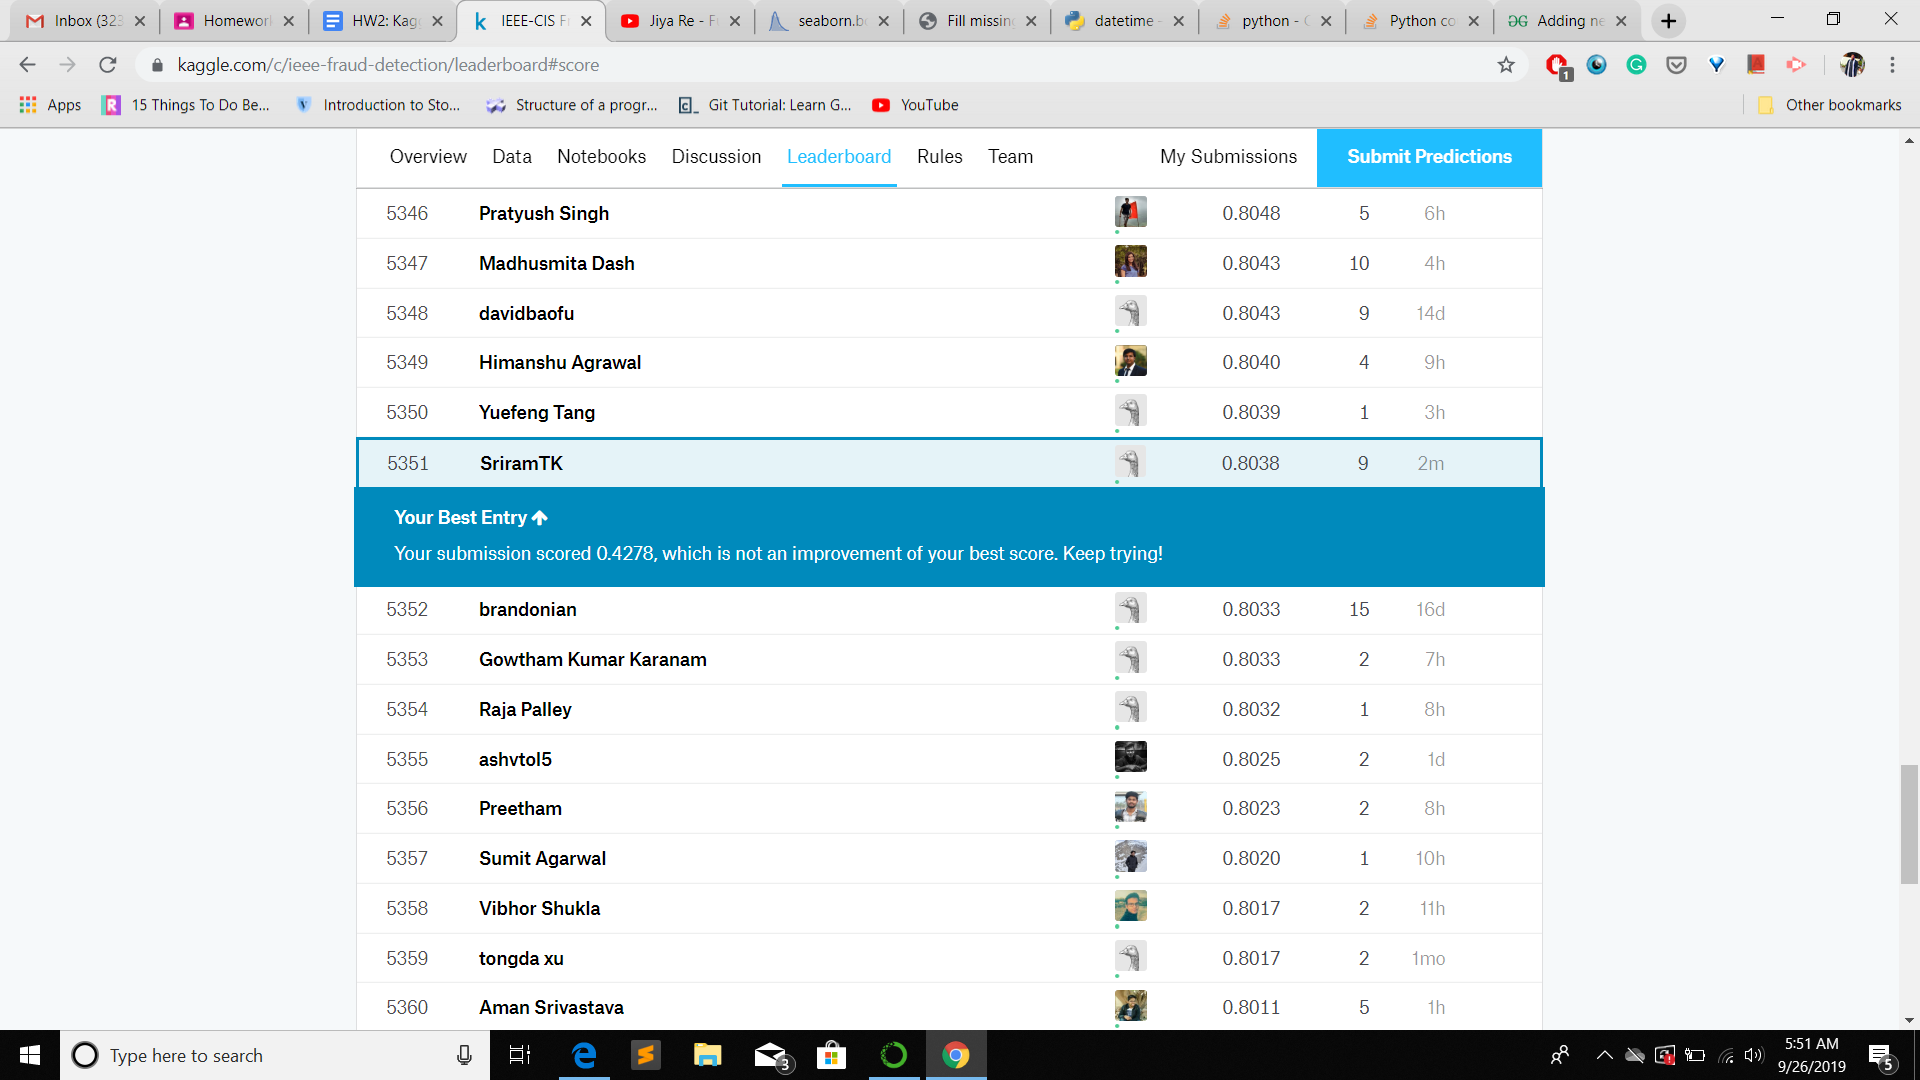INCLUDE IMAGE OF YOUR KAGGLE RANKING